<a href="https://colab.research.google.com/github/vinayh19/vinayh19/blob/main/Py_DataScience_project_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Science/gapminder_clean.csv


To complete the miniproject, create an analysis in jupyter-notebook which does the following:
Read in the gapminder_clean.csv data as a pandas DataFrame.

1. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

2. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

3. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

4. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [2]:
url = "https://github.com/Bioinformatics-Research-Network/skill-assessments/blob/main/Python%20for%20Data%20Science/gapminder_clean.csv"
raw_url = "https://raw.githubusercontent.com/Bioinformatics-Research-Network/skill-assessments/refs/heads/main/Python%20for%20Data%20Science/gapminder_clean.csv"

In [3]:
import requests
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px
import statsmodels as sm
from math import nan
from scipy.stats import f_oneway

In [30]:
data = requests.get(raw_url)
df = pd.read_csv(StringIO(data.text))
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


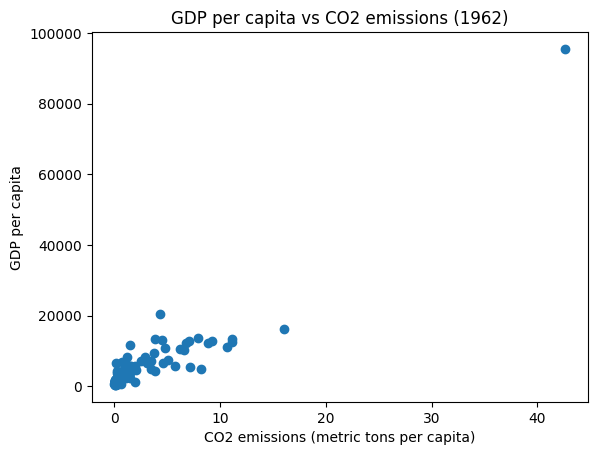

In [31]:
data_filter_1962 = df[df['Year'] == 1962]
data_filter_1962.head(3)
plt.scatter("CO2 emissions (metric tons per capita)", "gdpPercap", data=data_filter_1962, marker= 'o')
plt.ylabel("GDP per capita")
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.title("GDP per capita vs CO2 emissions (1962)")
plt.show()


In [32]:
check = data_filter_1962['CO2 emissions (metric tons per capita)'].unique()
emi_avg = round(data_filter_1962['CO2 emissions (metric tons per capita)'].mean(), 10)
print(emi_avg)
gdppc_avg = round(data_filter_1962['gdpPercap'].mean(), 10)
print(gdppc_avg)
print(data_filter_1962['gdpPercap'].describe()) # min(data_filter_1962['gdpPercap']), max(data_filter_1962['gdpPercap']), summary(data_filter_1962['gdpPercap']))
#print(check)
#print(data_filter_1962['CO2 emissions (metric tons per capita)'], data_filter_1962['gdpPercap'])
      #.corr(data_filter_1962['gdpPercap']))

2.2542676474
4958.8754640742
count      128.000000
mean      4958.875464
std       9078.312162
min        355.203227
25%       1056.239478
50%       2510.709298
75%       6085.300339
max      95458.111760
Name: gdpPercap, dtype: float64


In [33]:
data_filter_1962['CO2 emissions'] = data_filter_1962['CO2 emissions (metric tons per capita)'].mask(data_filter_1962['CO2 emissions (metric tons per capita)'].isna(), emi_avg)
data_filter_1962['gdpPercap_new'] = data_filter_1962['gdpPercap'].mask(data_filter_1962['gdpPercap'].isna(), gdppc_avg)
data_filter_1962.head(5)
#data_filter_1962.drop(columns=['CO2 emissions', 'gdpPercap_new'])

<ipython-input-33-04696df096d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter_1962['CO2 emissions'] = data_filter_1962['CO2 emissions (metric tons per capita)'].mask(data_filter_1962['CO2 emissions (metric tons per capita)'].isna(), emi_avg)
<ipython-input-33-04696df096d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter_1962['gdpPercap_new'] = data_filter_1962['gdpPercap'].mask(data_filter_1962['gdpPercap'].isna(), gdppc_avg)


,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",...,"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap,CO2 emissions,gdpPercap_new
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,...,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710,0.073781,853.100710
10,10,Albania,1962,NaN,1.439956,NaN,NaN,NaN,NaN,6.282,...,NaN,NaN,64.162854,62.456898,NaN,1728137.0,Europe,2312.888958,1.439956,2312.888958
20,20,Algeria,1962,NaN,0.484954,NaN,NaN,NaN,19.793873,7.614,...,NaN,2.351279,47.045000,4.908240,NaN,11000948.0,Africa,2550.816880,0.484954,2550.816880
30,30,American Samoa,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,105.590000,NaN,NaN,NaN,NaN,2.254268,4958.875464
40,40,Andorra,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.714894,NaN,NaN,NaN,NaN,2.254268,4958.875464


In [34]:
data_filter_1962_emigdp_cleaned = data_filter_1962.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])
data_filter_1962_emigdp_cleaned.head(5)

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",...,"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap,CO2 emissions,gdpPercap_new
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,...,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710,0.073781,853.100710
10,10,Albania,1962,NaN,1.439956,NaN,NaN,NaN,NaN,6.282,...,NaN,NaN,64.162854,62.456898,NaN,1728137.0,Europe,2312.888958,1.439956,2312.888958
20,20,Algeria,1962,NaN,0.484954,NaN,NaN,NaN,19.793873,7.614,...,NaN,2.351279,47.045000,4.908240,NaN,11000948.0,Africa,2550.816880,0.484954,2550.816880
50,50,Angola,1962,NaN,0.216025,NaN,NaN,NaN,NaN,7.396,...,NaN,NaN,33.787585,4.384299,NaN,4826015.0,Africa,4269.276742,0.216025,4269.276742
80,80,Argentina,1962,NaN,2.522392,17.265977,NaN,NaN,4.691843,3.089,...,NaN,28.871842,65.432610,7.778624,NaN,21283783.0,Americas,7133.166023,2.522392,7133.166023


In [35]:
correl = data_filter_1962['CO2 emissions (metric tons per capita)'].corr(data_filter_1962['gdpPercap'])
p_value = stats.pearsonr(data_filter_1962_emigdp_cleaned['CO2 emissions (metric tons per capita)'], data_filter_1962_emigdp_cleaned['gdpPercap'])

print("Correlation: ", correl)
print("P-value: ", p_value)

Correlation:  0.9260816725019451
P-value:  PearsonRResult(statistic=0.9260816725019472, pvalue=1.1286792210038658e-46)


In [36]:
df_subset_all_years = df[['Year', 'CO2 emissions (metric tons per capita)', 'gdpPercap']]
group_df = df_subset_all_years.groupby('Year')
corr = group_df.corr()
corr
#corr.describe()
#df_all_years_cleaned = df_all_years.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])


CO2 emissions (metric tons per capita)  \
Year                                                                                  
1962 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.926082   
1967 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.938792   
1972 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.842899   
1977 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.792834   
1982 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.816638   
1987 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.809553   
1992 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.809432   
1997 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.808140   
2002 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.800642   
2007 CO2 emissions (metric tons per capita)                                1.000000   
     gdpPercap                                                             0.720417   

                                             gdpPercap  
Year                                                    
1962 CO2 emissions (metric tons per capita)   0.926082  
     gdpPercap                                1.000000  
1967 CO2 emissions (metric tons per capita)   0.938792  
     gdpPercap                                1.000000  
1972 CO2 emissions (metric tons per capita)   0.842899  
     gdpPercap                                1.000000  
1977 CO2 emissions (metric tons per capita)   0.792834  
     gdpPercap                                1.000000  
1982 CO2 emissions (metric tons per capita)   0.816638  
     gdpPercap                                1.000000  
1987 CO2 emissions (metric tons per capita)   0.809553  
     gdpPercap                                1.000000  
1992 CO2 emissions (metric tons per capita)   0.809432  
     gdpPercap                                1.000000  
1997 CO2 emissions (metric tons per capita)   0.808140  
     gdpPercap                                1.000000  
2002 CO2 emissions (metric tons per capita)   0.800642  
     gdpPercap                                1.000000  
2007 CO2 emissions (metric tons per capita)   0.720417  
     gdpPercap                                1.000000

In [37]:
data_filter_1967 = df[df['Year'] == 1967]
data_filter_1967.head(3)

#plt.scatter("CO2 emissions (metric tons per capita)", "gdpPercap", data=data_filter_1967, marker= 'o' )
#plt.ylabel("GDP per capita")
#plt.xlabel("CO2 emissions (metric tons per capita)")
#plt.title("GDP per capita vs CO2 emissions (1967)")
#plt.show()

print("\n\n")
fig = px.scatter(data_filter_1967, x='CO2 emissions (metric tons per capita)', y='gdpPercap',
                 size='pop', color='continent', hover_name='Country Name', title='CO2 Emissions vs GDP per Capita (1967)')
fig.show()

In [38]:
# NEXT Section

1. What is the relationship between `continent` and `Energy use (kg of oil equivalent per capita)`? (Stats test needed)
2. Is there a significant difference between Europe and Asia with respect to `'Imports of goods and services (% of GDP)'` in the years after 1990? (Stats test needed)
3. What is the country (or countries) that has the highest `'Population density (people per sq. km of land area)'` across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)
4. What country (or countries) has shown the greatest increase in `'Life expectancy at birth, total (years)'` between 1962 and 2007?

In [39]:
continents = df['continent'].unique()
continents
cols = df.columns.tolist()
print(continents, "\n\n", cols)

['Asia' 'Europe' 'Africa' nan 'Americas' 'Oceania'] 

 ['Unnamed: 0', 'Country Name', 'Year', 'Agriculture, value added (% of GDP)', 'CO2 emissions (metric tons per capita)', 'Domestic credit provided by financial sector (% of GDP)', 'Electric power consumption (kWh per capita)', 'Energy use (kg of oil equivalent per capita)', 'Exports of goods and services (% of GDP)', 'Fertility rate, total (births per woman)', 'GDP growth (annual %)', 'Imports of goods and services (% of GDP)', 'Industry, value added (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Life expectancy at birth, total (years)', 'Population density (people per sq. km of land area)', 'Services, etc., value added (% of GDP)', 'pop', 'continent', 'gdpPercap']


In [40]:
cols = df.columns.tolist()
print(cols)
df_new = df[['continent', 'Country Name', 'Year', 'Energy use (kg of oil equivalent per capita)', 'Imports of goods and services (% of GDP)', 'Population density (people per sq. km of land area)', 'Life expectancy at birth, total (years)']]
df_new.head(21)

['Unnamed: 0', 'Country Name', 'Year', 'Agriculture, value added (% of GDP)', 'CO2 emissions (metric tons per capita)', 'Domestic credit provided by financial sector (% of GDP)', 'Electric power consumption (kWh per capita)', 'Energy use (kg of oil equivalent per capita)', 'Exports of goods and services (% of GDP)', 'Fertility rate, total (births per woman)', 'GDP growth (annual %)', 'Imports of goods and services (% of GDP)', 'Industry, value added (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Life expectancy at birth, total (years)', 'Population density (people per sq. km of land area)', 'Services, etc., value added (% of GDP)', 'pop', 'continent', 'gdpPercap']


,continent,Country Name,Year,Energy use (kg of oil equivalent per capita),Imports of goods and services (% of GDP),Population density (people per sq. km of land area),"Life expectancy at birth, total (years)"
0,Asia,Afghanistan,1962,NaN,9.349593,14.312061,33.219902
1,Asia,Afghanistan,1967,NaN,14.209827,15.881812,35.389415
2,Asia,Afghanistan,1972,NaN,18.105850,17.947027,37.610146
3,Asia,Afghanistan,1977,NaN,14.823175,19.998926,40.110146
4,Asia,Afghanistan,1982,NaN,NaN,19.402324,43.230732
5,Asia,Afghanistan,1987,NaN,NaN,17.366559,47.296341
6,Asia,Afghanistan,1992,NaN,NaN,21.054483,51.362927
7,Asia,Afghanistan,1997,NaN,NaN,27.623273,54.017829
8,Asia,Afghanistan,2002,NaN,65.287704,32.912231,55.857195
9,Asia,Afghanistan,2007,NaN,58.350047,39.637202,57.833829


In [41]:
df_new['Country Name'] = df_new['Country Name'].fillna('Country_Name')
df_new['continent'] = df_new['continent'].fillna('Continent_Name')
df_new['Year'] = df_new['Year'].fillna('9999')
df_new.head(20)

<ipython-input-41-9a83195a5c93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-9a83195a5c93>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-9a83195a5c93>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,continent,Country Name,Year,Energy use (kg of oil equivalent per capita),Imports of goods and services (% of GDP),Population density (people per sq. km of land area),"Life expectancy at birth, total (years)"
0,Asia,Afghanistan,1962,NaN,9.349593,14.312061,33.219902
1,Asia,Afghanistan,1967,NaN,14.209827,15.881812,35.389415
2,Asia,Afghanistan,1972,NaN,18.105850,17.947027,37.610146
3,Asia,Afghanistan,1977,NaN,14.823175,19.998926,40.110146
4,Asia,Afghanistan,1982,NaN,NaN,19.402324,43.230732
5,Asia,Afghanistan,1987,NaN,NaN,17.366559,47.296341
6,Asia,Afghanistan,1992,NaN,NaN,21.054483,51.362927
7,Asia,Afghanistan,1997,NaN,NaN,27.623273,54.017829
8,Asia,Afghanistan,2002,NaN,65.287704,32.912231,55.857195
9,Asia,Afghanistan,2007,NaN,58.350047,39.637202,57.833829


In [42]:
#df_new check
df_new_subset = df_new[['continent', 'Country Name']]
unq = df_new_subset.drop_duplicates()
unq.head(264)

,continent,Country Name
0,Asia,Afghanistan
10,Europe,Albania
20,Africa,Algeria
30,Continent_Name,American Samoa
40,Continent_Name,Andorra
...,...,...
2563,Asia,West Bank and Gaza
2567,Continent_Name,World
2577,Continent_Name,"Yemen, Rep."
2587,Africa,Zambia


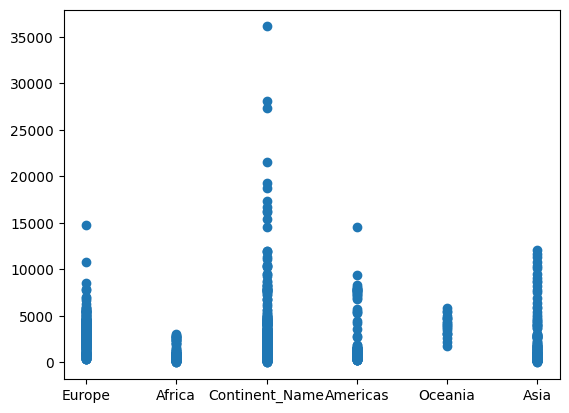

In [43]:
df_new_energy  = df_new[['Year', 'continent', 'Energy use (kg of oil equivalent per capita)']]
#avg = df_new_energy['Energy use (kg of oil equivalent per capita)'].mean()
#df_new_energy['Energy use (kg of oil equivalent per capita)'] = df_new_energy['Energy use (kg of oil equivalent per capita)'].fillna(avg)
df_new_energy = df_new_energy.dropna(subset=['Energy use (kg of oil equivalent per capita)', 'continent'])
#df_new_energy.head(5)
#df_new_energy.dropna(axis='rows', thresh=3)
df_new_energy.head(40)
plt.scatter("continent", "Energy use (kg of oil equivalent per capita)", data=df_new_energy, marker= 'o')



In [44]:
#One-way ANOVA test
energy_by_continent = df_new_energy.groupby('continent')['Energy use (kg of oil equivalent per capita)'].apply(list)
f_statistic, p_value = f_oneway(*energy_by_continent)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in energy use among continents.")


F-statistic: 21.879699860882027
P-value: 3.732041363895701e-21
There is a statistically significant difference in energy use among continents.


In [45]:
energy_by_continent

,Energy use (kg of oil equivalent per capita)
continent,
Africa,"[261.465250751, 398.656113469, 771.235497639, ..."
Americas,"[1379.81886741, 1420.56765898, 1416.53992488, ..."
Asia,"[5960.21133509, 8187.11498635, 9071.02474414, ..."
Continent_Name,"[1729.91930993, 411.951769624, 561.243583009, ..."
Europe,"[865.592481207, 923.728867504, 966.683283781, ..."
Oceania,"[3172.97486502, 3692.80794983, 4035.20634439, ..."


In [46]:
df_new_after_1990 = df_new[df_new['Year'] > 1990]
europe_data = df_new_after_1990[df_new_after_1990['continent'] == 'Europe']
asia_data = df_new_after_1990[df_new_after_1990['continent'] == 'Asia']
europe_imports = europe_data['Imports of goods and services (% of GDP)'].dropna()
asia_imports = asia_data['Imports of goods and services (% of GDP)'].dropna()

#t-test - comparing means
t_statistic, p_value = stats.ttest_ind(europe_imports, asia_imports)

print("T-statistic: ",t_statistic)
print("P-value: ", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference b/w EU and ASIA interms of imports")
else:
    print("There is NO statistically significant difference b/w EU and ASIA interms of imports")

T-statistic:  -1.4185256887958868
P-value:  0.15751969325554196
There is NO statistically significant difference b/w EU and ASIA interms of imports


In [47]:
df_new_pop_group = df_new.groupby(['Country Name', 'Year'])['Population density (people per sq. km of land area)'].max().reset_index()
#df_new_pop_group.head(10)
#df_new_pop_group.describe()
datapoint = df_new_pop_group[df_new_pop_group['Population density (people per sq. km of land area)'] == df_new_pop_group['Population density (people per sq. km of land area)'].max()]
datapoint


,Country Name,Year,Population density (people per sq. km of land area)
1447,"Macao SAR, China",1997,20601.55


In [48]:
df_new_pop_group.describe()

,Year,Population density (people per sq. km of land area)
count,2607.000000,2558.000000
mean,1984.587265,260.380222
std,14.369906,1368.159410
min,1962.000000,0.102429
25%,1972.000000,17.442915
50%,1987.000000,46.112517
75%,1997.000000,119.047272
max,2007.000000,20601.550000


In [49]:
df_new_life_exp = df_new[['Country Name', 'Year', 'Life expectancy at birth, total (years)']]
df_new_life_exp = df_new_life_exp.dropna(subset=['Life expectancy at birth, total (years)'])
df_new_life_exp.head(4)

,Country Name,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,1962,33.219902
1,Afghanistan,1967,35.389415
2,Afghanistan,1972,37.610146
3,Afghanistan,1977,40.110146


In [50]:
df_new_life_exp['Trend'] = df_new_life_exp.groupby('Country Name')['Life expectancy at birth, total (years)'].diff()
df_new_life_exp['Trend (%YoY)'] = df_new_life_exp.groupby('Country Name')['Life expectancy at birth, total (years)'].pct_change() * 100
df_new_life_exp.head(20)


,Country Name,Year,"Life expectancy at birth, total (years)",Trend,Trend (%YoY)
0,Afghanistan,1962,33.219902,NaN,NaN
1,Afghanistan,1967,35.389415,2.169512,6.530760
2,Afghanistan,1972,37.610146,2.220732,6.275130
3,Afghanistan,1977,40.110146,2.500000,6.647142
4,Afghanistan,1982,43.230732,3.120585,7.780040
5,Afghanistan,1987,47.296341,4.065610,9.404444
6,Afghanistan,1992,51.362927,4.066585,8.598097
7,Afghanistan,1997,54.017829,2.654902,5.168908
8,Afghanistan,2002,55.857195,1.839366,3.405109
9,Afghanistan,2007,57.833829,1.976634,3.538728


In [51]:
#df_new_life_exp = df_new_life_exp.drop(columns = 'Trend (YoY)', axis=1)
#df_new_life_exp.head(40)

In [52]:
variance_by_country = df_new_life_exp.groupby('Country Name')['Trend (%YoY)'].var()
country_with_largest_variance = variance_by_country.idxmax(skipna=True)

print("The country with the largest variance in Population is: ", country_with_largest_variance)
#plt.plot(df_new_life_exp['Year'], df_new_life_exp['Life expectancy at birth, total (years)'])
#plt.show()

The country with the largest variance in Population is:  Cambodia
